In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [46]:
file_path = '/content/combined_chess_moves.csv'
df = pd.read_csv(file_path)

In [47]:
df.shape

(1100, 1)

In [48]:
df.head()

,Data points
0,211090.0
1,336722.0
2,203122.0
3,147749.0
4,297089.0


In [49]:
df.isnull().sum()

Data points    0
dtype: int64

In [50]:
df.mean()

Data points    181907.06444
dtype: float64

In [51]:
df.mode()

,Data points
0,450.876419
1,451.000000
2,1581.000000
3,1581.077049
4,1760.000000
...,...
1095,374230.010039
1096,375474.000000
1097,375474.082554
1098,376473.902866


In [52]:
df.median()

Data points    179765.894727
dtype: float64

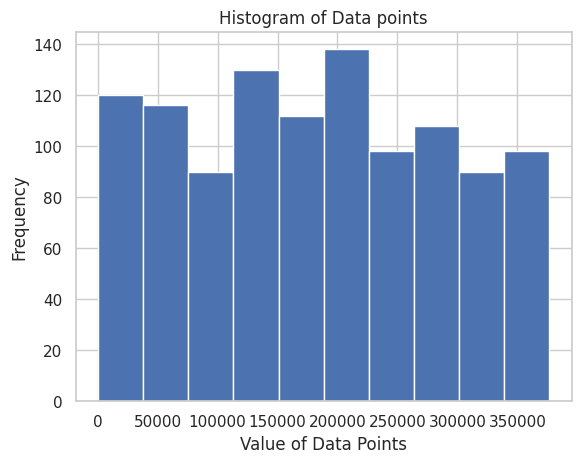

In [53]:
import matplotlib.pyplot as plt
df["Data points"].hist()
plt.xlabel("Value of Data Points")
plt.ylabel("Frequency")
plt.title("Histogram of Data points")

plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data points  1100 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [55]:
df.describe()

,Data points
count,1100.000000
mean,181907.064440
std,106776.069072
min,450.876419
25%,89393.921455
50%,179765.894727
75%,272316.946223
max,376474.000000


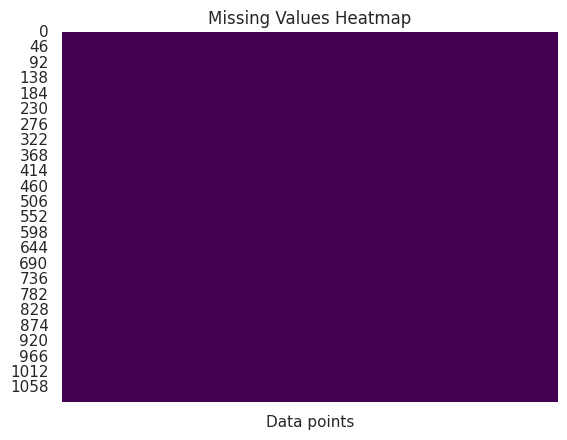

In [56]:
import seaborn as sns
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

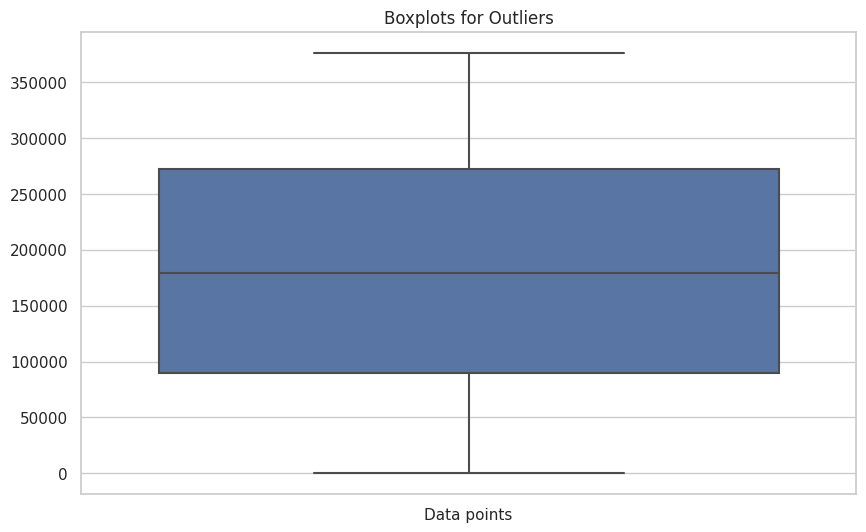

In [57]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplots for Outliers')
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


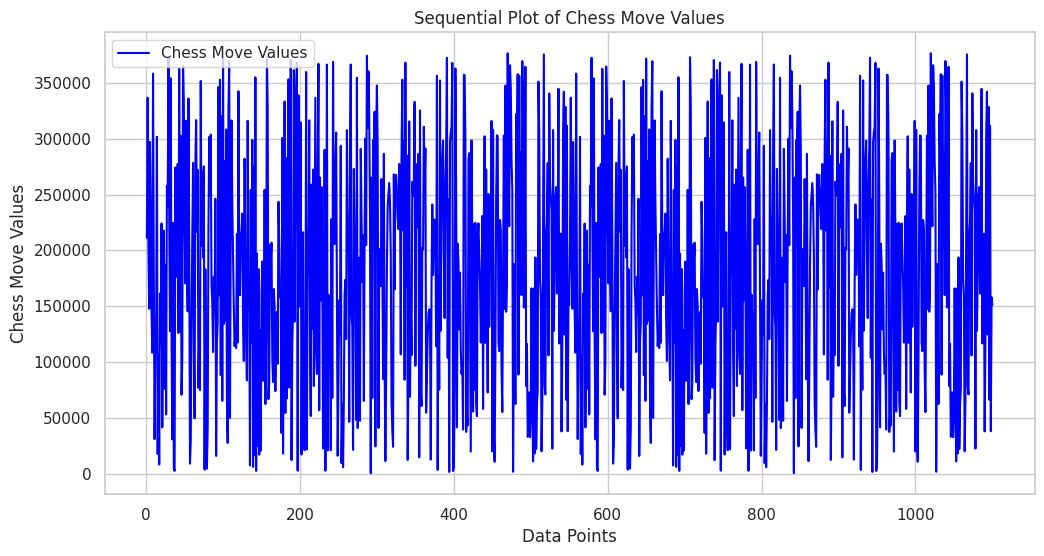

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a basic index for the data
df['index'] = range(1, len(df) + 1)
df.set_index('index', inplace=True)


value_column = 'Data points'

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[value_column], label='Chess Move Values', color='blue')
plt.title('Sequential Plot of Chess Move Values')
plt.xlabel('Data Points')
plt.ylabel('Chess Move Values')
plt.legend()
plt.show()



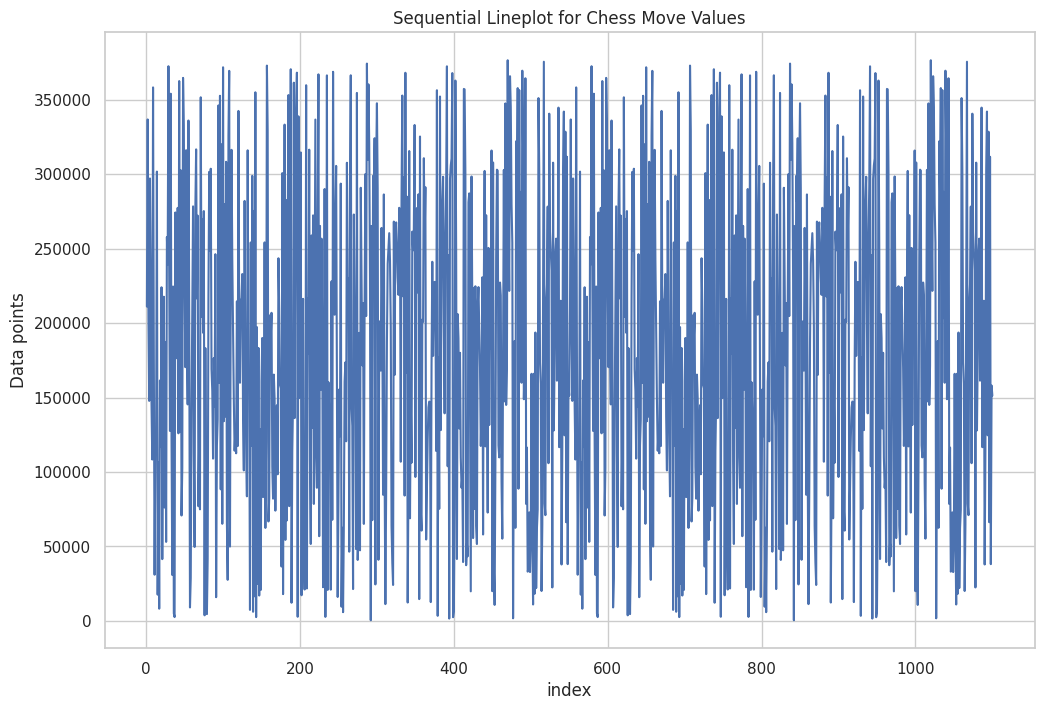

In [60]:
# Check for trends, seasonality, and irregularities using a lineplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(x=df.index, y=df[value_column])
plt.title('Sequential Lineplot for Chess Move Values')
plt.show()

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [62]:
# Create lag features for historical moves (e.g., lag of 1, 2, 3, ...)
num_lags = 3 # You can adjust the number of lag features based on your needs
for i in range(1, num_lags + 1):
    df[f'{value_column}_lag_{i}'] = df[value_column].shift(i)


In [63]:
# Drop rows with NaN values introduced by lag features
df.dropna(inplace=True)

In [64]:
df

,Data points,Data points_lag_1,Data points_lag_2,Data points_lag_3
index,,,,
4,147749.000000,203122.000000,336722.000000,211090.000000
5,297089.000000,147749.000000,203122.000000,336722.000000
6,230196.000000,297089.000000,147749.000000,203122.000000
7,145903.000000,230196.000000,297089.000000,147749.000000
8,108383.000000,145903.000000,230196.000000,297089.000000
...,...,...,...,...
1096,66275.969093,328495.960812,124629.047656,342007.919572
1097,311654.050397,66275.969093,328495.960812,124629.047656
1098,38131.246062,311654.050397,66275.969093,328495.960812


In [65]:
# Normalize or scale the data using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [66]:
# Display the scaled dataframe
print("\nScaled DataFrame:")
df_scaled.head()


Scaled DataFrame:


,Data points,Data points_lag_1,Data points_lag_2,Data points_lag_3
0,0.391726,0.538986,0.894283,0.560176
1,0.788883,0.391726,0.538986,0.894283
2,0.610987,0.788883,0.391726,0.538986
3,0.386817,0.610987,0.788883,0.391726
4,0.287036,0.386817,0.610987,0.788883


In [67]:

target_column = 'Data points'

# Set the percentage for training data (e.g., 80% for training, 20% for testing)
train_percentage = 0.9

# Calculate the split index
split_index = int(len(df) * train_percentage)

# Split the data into training and testing sets
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Separate features and target for training and testing
X_train, y_train = train_data.drop(target_column, axis=1), train_data[target_column]
X_test, y_test = test_data.drop(target_column, axis=1), test_data[target_column]

# Display the shapes of the sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (987, 3) (987,)
Testing set shape: (110, 3) (110,)


In [68]:
import numpy as np
import pandas as pd


# Function to create sequences with a sliding window
def create_sequences(data, target, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length].values
        label = target.iloc[i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Experiment with different sequence lengths
sequence_lengths = [5, 10, 15, 20]

for seq_length in sequence_lengths:
    # Create sequences for training set
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)

    # Create sequences for testing set
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Display the shapes of the generated sequences
    print(f"\nSequence Length: {seq_length}")
    print("Training set shape:", X_train_seq.shape, y_train_seq.shape)
    print("Testing set shape:", X_test_seq.shape, y_test_seq.shape)
    # Reshape the sequences to match the input requirements of the LSTM model
    X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
    X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

# Display the shapes after reshaping
    print("\nReshaped Training set shape:", X_train_seq.shape, y_train_seq.shape)
    print("Reshaped Testing set shape:", X_test_seq.shape, y_test_seq.shape)



Sequence Length: 5
Training set shape: (982, 5, 3) (982,)
Testing set shape: (105, 5, 3) (105,)

Reshaped Training set shape: (982, 5, 3) (982,)
Reshaped Testing set shape: (105, 5, 3) (105,)

Sequence Length: 10
Training set shape: (977, 10, 3) (977,)
Testing set shape: (100, 10, 3) (100,)

Reshaped Training set shape: (977, 10, 3) (977,)
Reshaped Testing set shape: (100, 10, 3) (100,)

Sequence Length: 15
Training set shape: (972, 15, 3) (972,)
Testing set shape: (95, 15, 3) (95,)

Reshaped Training set shape: (972, 15, 3) (972,)
Reshaped Testing set shape: (95, 15, 3) (95,)

Sequence Length: 20
Training set shape: (967, 20, 3) (967,)
Testing set shape: (90, 20, 3) (90,)

Reshaped Training set shape: (967, 20, 3) (967,)
Reshaped Testing set shape: (90, 20, 3) (90,)


In [69]:
from sklearn.preprocessing import MinMaxScaler


# Reshape your 3D input data to 2D for MinMax scaling
X_train_seq_2d = X_train_seq.reshape(X_train_seq.shape[0] * X_train_seq.shape[1], X_train_seq.shape[2])
X_test_seq_2d = X_test_seq.reshape(X_test_seq.shape[0] * X_test_seq.shape[1], X_test_seq.shape[2])

# Apply MinMax scaling to features (X)
scaler_X = MinMaxScaler()
X_train_seq_scaled = scaler_X.fit_transform(X_train_seq_2d)
X_test_seq_scaled = scaler_X.transform(X_test_seq_2d)

# Reshape the scaled data back to 3D
X_train_seq_scaled = X_train_seq_scaled.reshape(X_train_seq.shape)
X_test_seq_scaled = X_test_seq_scaled.reshape(X_test_seq.shape)

# Apply MinMax scaling to target variable (y)
scaler_y = MinMaxScaler()
y_train_seq_scaled = scaler_y.fit_transform(y_train_seq.reshape(-1, 1))
y_test_seq_scaled = scaler_y.transform(y_test_seq.reshape(-1, 1))

# Display the shape of the scaled sets
print("Scaled Training set shape:", X_train_seq_scaled.shape, y_train_seq_scaled.shape)
print("Scaled Testing set shape:", X_test_seq_scaled.shape, y_test_seq_scaled.shape)


Scaled Training set shape: (967, 20, 3) (967, 1)
Scaled Testing set shape: (90, 20, 3) (90, 1)


In [70]:
import numpy as np

def time_series_data_augmentation(X, y, num_augmentations=5, scale_range=(0.9, 1.1), shift_range=(-0.1, 0.1), noise_std=0.01):
    augmented_X, augmented_y = [], []

    for i in range(X.shape[0]):
        for _ in range(num_augmentations):
            # Randomly scale the time series
            scale_factor = np.random.uniform(scale_range[0], scale_range[1])
            scaled_series = X[i] * scale_factor

            # Randomly shift the time series
            shift_factor = np.random.uniform(shift_range[0], shift_range[1])
            shifted_series = scaled_series + shift_factor

            # Add random noise
            noisy_series = shifted_series + np.random.normal(0, noise_std, size=shifted_series.shape)

            # Append augmented data
            augmented_X.append(noisy_series)
            augmented_y.append(y[i])

    augmented_X = np.array(augmented_X)
    augmented_y = np.array(augmented_y)

    return augmented_X, augmented_y


In [71]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a time series dataset X_train_seq and corresponding target variable y_train_seq

# Reshape your 3D input data to 2D for normalization
X_train_seq_2d = X_train_seq.reshape(X_train_seq.shape[0] * X_train_seq.shape[1], X_train_seq.shape[2])

# Apply StandardScaler to features (X)
scaler_X = StandardScaler()
X_train_seq_scaled_2d = scaler_X.fit_transform(X_train_seq_2d)

# Reshape the scaled data back to 3D
X_train_seq_scaled = X_train_seq_scaled_2d.reshape(X_train_seq.shape)

# Apply StandardScaler to the target variable (y)
scaler_y = StandardScaler()
y_train_seq_scaled = scaler_y.fit_transform(y_train_seq.reshape(-1, 1))

# Display the shape of the scaled sets
print("Scaled Training set shape:", X_train_seq_scaled.shape, y_train_seq_scaled.shape)


Scaled Training set shape: (967, 20, 3) (967, 1)


In [72]:
from sklearn.preprocessing import MinMaxScaler

# Reshape your 3D input data to 2D for normalization
X_train_seq_2d = X_train_seq.reshape(X_train_seq.shape[0] * X_train_seq.shape[1], X_train_seq.shape[2])

# Apply MinMax scaling to features (X)
scaler_X = MinMaxScaler()
X_train_seq_normalized_2d = scaler_X.fit_transform(X_train_seq_2d)

# Reshape the normalized data back to 3D
X_train_seq_normalized = X_train_seq_normalized_2d.reshape(X_train_seq.shape)

# Apply MinMax scaling to the target variable (y)
scaler_y = MinMaxScaler()
y_train_seq_normalized = scaler_y.fit_transform(y_train_seq.reshape(-1, 1))

# Display the shape of the normalized sets
print("Normalized Training set shape:", X_train_seq_normalized.shape, y_train_seq_normalized.shape)


Normalized Training set shape: (967, 20, 3) (967, 1)


In [73]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.regularizers import l2

model = Sequential()

# Add the first SimpleRNN layer with 100 units and L2 regularization
model.add(SimpleRNN(units=100, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                    kernel_regularizer=l2(0.01), return_sequences=True))

# Add the second SimpleRNN layer with 50 units and L2 regularization
model.add(SimpleRNN(units=50, activation='relu', kernel_regularizer=l2(0.01)))

# Add a Dense output layer with L2 regularization
model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))

# Compile your model with mean absolute error as loss
model.compile(optimizer='adam', loss='mean_absolute_error')

# Display a summary of your complex model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 20, 100)           10400     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                7550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 18001 (70.32 KB)
Trainable params: 18001 (70.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
28/28 [==============================] - 4s 52ms/step - loss: 137141.1406 - val_loss: 94982.9922
Epoch 2/100
28/28 [==============================] - 1s 38ms/step - loss: 92929.1094 - val_loss: 92428.5391
Epoch 3/100
28/28 [==============================] - 2s 69ms/step - loss: 91086.2812 - val_loss: 92850.6250
Epoch 4/100
28/28 [==============================] - 2s 75ms/step - loss: 89359.8438 - val_loss: 94160.9453
Epoch 5/100
28/28 [==============================] - 1s 41ms/step - loss: 90748.2031 - val_loss: 95127.6172
Epoch 6/100
28/28 [==============================] - 1s 38ms/step - loss: 86644.0156 - val_loss: 92813.0234
Epoch 7/100
28/28 [==============================] - 1s 39ms/step - loss: 84744.7266 - val_loss: 90788.4609
Epoch 8/100
28/28 [==============================] - 1s 40ms/step - loss: 82713.4688 - val_loss: 92678.1250
Epoch 9/100
28/28 [==============================] - 1s 39ms/step - loss: 80803.2188 - val_loss: 92545.5703
Epoch 10/100
28/28 [=======

In [75]:
# Predict on the test set
y_pred = model.predict(X_test_seq)


3/3 [==============================] - 0s 10ms/step


In [76]:
# Inverse transform the predicted and actual values if you applied scaling or normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [77]:


# Apply MinMax scaling to features (X)
scaler_X = MinMaxScaler()
X_train_seq_scaled = scaler_X.fit_transform(X_train_seq.reshape(X_train_seq.shape[0] * X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq_scaled = scaler_X.transform(X_test_seq.reshape(X_test_seq.shape[0] * X_test_seq.shape[1], X_test_seq.shape[2]))

# Apply MinMax scaling to target variable (y)
scaler_y = MinMaxScaler()
y_train_seq_scaled = scaler_y.fit_transform(y_train_seq.reshape(-1, 1))

# Predict on the test set
y_pred = model.predict(X_test_seq)

# Reshape the predicted values to 2D
y_pred_2d = y_pred.reshape(-1, 1)

# Inverse transform the predicted and actual values
y_pred_inv = scaler_y.inverse_transform(y_pred_2d)
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))


3/3 [==============================] - 0s 7ms/step


In [78]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))


In [79]:
# Display evaluation metrics
print(f"Initial Mean Absolute Error (MAE): {mae}")
print(f"Initial Root Mean Squared Error (RMSE): {rmse}")

Initial Mean Absolute Error (MAE): 5439999382.684532
Initial Root Mean Squared Error (RMSE): 7916007481.42423


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



# Calculate MAE as a percentage of the mean or median
mae_percentage_mean = (mae / np.mean(y_test_inv)) * 100
mae_percentage_median = (mae/ np.median(y_test_inv)) * 100

print(f"MAE as a percentage of mean: {mae_percentage_mean:.2f}%")
print(f"MAE as a percentage of median: {mae_percentage_median:.2f}%")


MAE as a percentage of mean: 7.72%
MAE as a percentage of median: 8.20%


In [81]:
# Fine-tune based on evaluation results
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
28/28 [==============================] - 1s 51ms/step - loss: 11919.0928 - val_loss: 10874.7666
Epoch 2/50
28/28 [==============================] - 2s 78ms/step - loss: 12028.0723 - val_loss: 14063.3184
Epoch 3/50
28/28 [==============================] - 1s 49ms/step - loss: 11942.5645 - val_loss: 17445.2598
Epoch 4/50
28/28 [==============================] - 1s 41ms/step - loss: 12175.8652 - val_loss: 13798.7451
Epoch 5/50
28/28 [==============================] - 1s 37ms/step - loss: 12054.1611 - val_loss: 14155.9971
Epoch 6/50
28/28 [==============================] - 1s 38ms/step - loss: 13507.8750 - val_loss: 15816.5928
Epoch 7/50
28/28 [==============================] - 2s 55ms/step - loss: 13511.5322 - val_loss: 14895.7178
Epoch 8/50
28/28 [==============================] - 2s 78ms/step - loss: 13353.7598 - val_loss: 13136.9238
Epoch 9/50
28/28 [==============================] - 1s 44ms/step - loss: 13547.2734 - val_loss: 15776.4199
Epoch 10/50
28/28 [==================

3/3 [==============================] - 0s 7ms/step


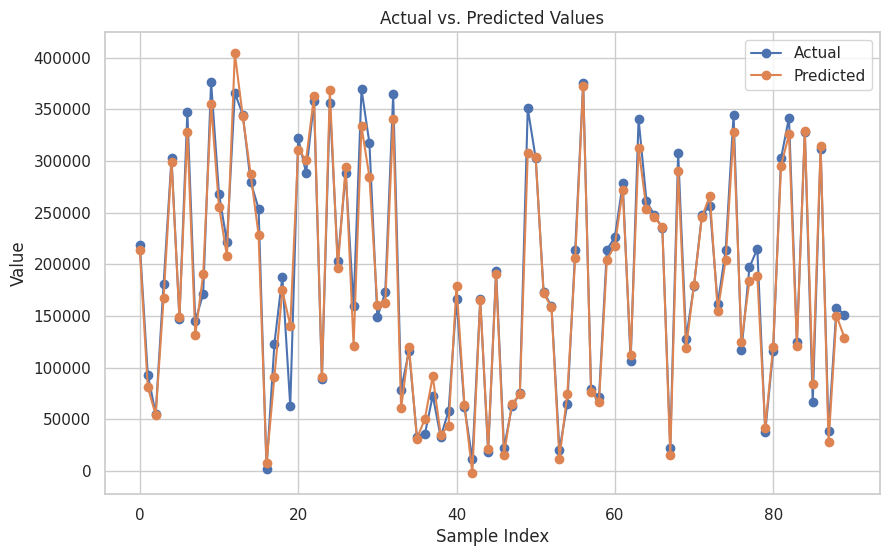

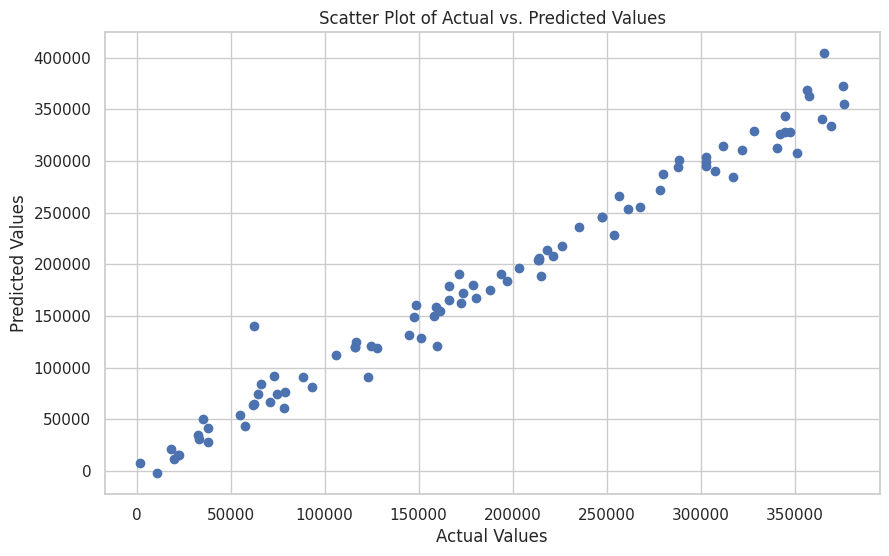

In [82]:
import matplotlib.pyplot as plt


# Make predictions on the test set
predictions = model.predict(X_test_seq)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='o')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot a scatter plot for more detailed view
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, predictions)
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [83]:

# Apply MinMax scaling to features (X) - use the same scaler used for training data
X_test_seq_scaled = scaler_X.transform(X_test_seq.reshape(X_test_seq.shape[0] * X_test_seq.shape[1], X_test_seq.shape[2]))

# Predict on the test set
y_pred_finetuned = model.predict(X_test_seq)

# Reshape the predicted values to 2D
y_pred_finetuned_2d = y_pred_finetuned.reshape(-1, 1)

# Inverse transform the predicted and actual values - use the same scaler used for training target variable (y)
y_pred_finetuned_inv = scaler_y.inverse_transform(y_pred_finetuned_2d)
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))


3/3 [==============================] - 0s 8ms/step


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Calculate evaluation metrics
mae_finetuned = mean_absolute_error(y_test_inv, y_pred_finetuned_inv)
rmse_finetuned = np.sqrt(mean_squared_error(y_test_inv, y_pred_finetuned_inv))

# Display evaluation metrics after fine-tuning
print(f"Fine-tuned Mean Absolute Error (MAE): {mae_finetuned}")
print(f"Fine-tuned Root Mean Squared Error (RMSE): {rmse_finetuned}")


Fine-tuned Mean Absolute Error (MAE): 4354001925.278362
Fine-tuned Root Mean Squared Error (RMSE): 6255824685.375488


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Calculate evaluation metrics
mae_finetuned = mean_absolute_error(y_test_inv, y_pred_finetuned_inv)
rmse_finetuned = np.sqrt(mean_squared_error(y_test_inv, y_pred_finetuned_inv))

# Calculate MAE as a percentage of the mean or median
mae_percentage_mean = (mae_finetuned / np.mean(y_test_inv)) * 100
mae_percentage_median = (mae_finetuned / np.median(y_test_inv)) * 100

# Display evaluation metrics after fine-tuning
print(f"Fine-tuned Mean Absolute Error (MAE): {mae_finetuned}")
print(f"Fine-tuned Root Mean Squared Error (RMSE): {rmse_finetuned}")
print(f"Fine-tuned MAE as a percentage of mean: {mae_percentage_mean:.2f}%")
print(f"Fine-tuned MAE as a percentage of median: {mae_percentage_median:.2f}%")


Fine-tuned Mean Absolute Error (MAE): 4354001925.278362
Fine-tuned Root Mean Squared Error (RMSE): 6255824685.375488
Fine-tuned MAE as a percentage of mean: 6.18%
Fine-tuned MAE as a percentage of median: 6.57%


In [86]:
model.save("/content/WEIGHTS/SummitionWeights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


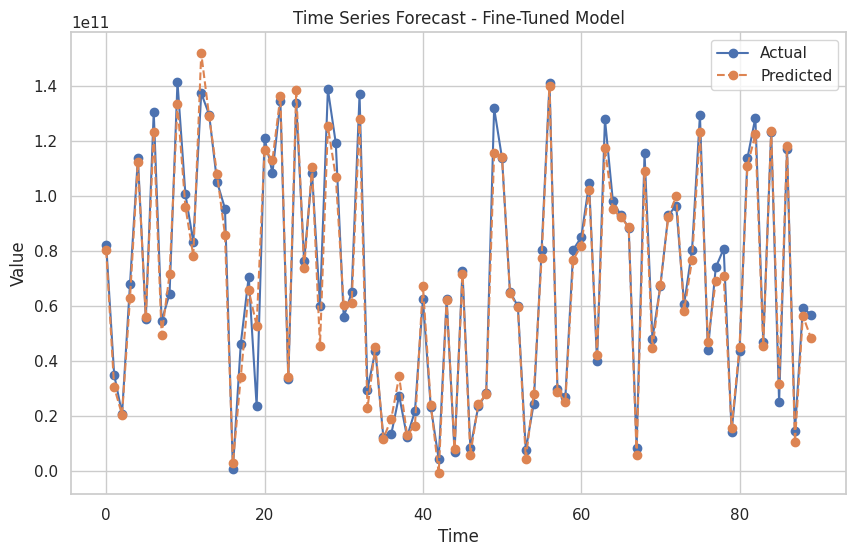

In [87]:
import matplotlib.pyplot as plt

# Create a time array for the x-axis (assuming a time-based sequence)
time_array_test = range(len(y_test_inv))

# Plot the actual and predicted time series
plt.figure(figsize=(10, 6))
plt.plot(time_array_test, y_test_inv, label='Actual', marker='o')
plt.plot(time_array_test, y_pred_finetuned_inv, label='Predicted', linestyle='dashed', marker='o')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast - Fine-Tuned Model')
plt.legend()

# Show the plot
plt.show()


In [88]:
# Calculate MAE as a percentage of the true values
mae_percentage = (mean_absolute_error(y_test_inv, y_pred_finetuned_inv) / np.abs(y_test_inv).mean()) * 100

# Display the result
print(f"Fine-tuned MAE as a percentage of the true values: {mae_percentage:.2f}%")

Fine-tuned MAE as a percentage of the true values: 6.18%
